In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [2]:
import pandas as pd

# Load dataset
df = pd.read_excel('dataset.xlsx')

# Columns to one-hot encode
categorical_cols = [
    "OverTime",
    "MaritalStatus",
    "JobRole",
    "Gender",
    "EducationField",
    "Department",
    "BusinessTravel",
    "Attrition"
]

# Perform one-hot encoding (creates dummy variables)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
df

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Attrition_Yes
0,41,1,2,2,3,2,4,5993,8,11,...,1,0,0,0,0,0,1,0,1,1
1,49,8,1,3,2,2,2,5130,1,23,...,1,0,0,0,0,1,0,1,0,0
2,37,2,2,4,2,1,3,2090,6,15,...,0,0,0,1,0,1,0,0,1,1
3,33,3,4,4,3,1,3,2909,1,11,...,1,0,0,0,0,1,0,1,0,0
4,27,2,1,1,3,1,2,3468,9,12,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,3,4,2,4,2571,4,17,...,0,0,1,0,0,1,0,1,0,0
1466,39,6,1,4,2,3,1,9991,4,15,...,0,0,1,0,0,1,0,0,1,0
1467,27,4,3,2,4,2,2,6142,1,20,...,1,0,0,0,0,1,0,0,1,0
1468,49,2,3,4,2,2,2,5390,2,14,...,0,0,1,0,0,0,1,1,0,0


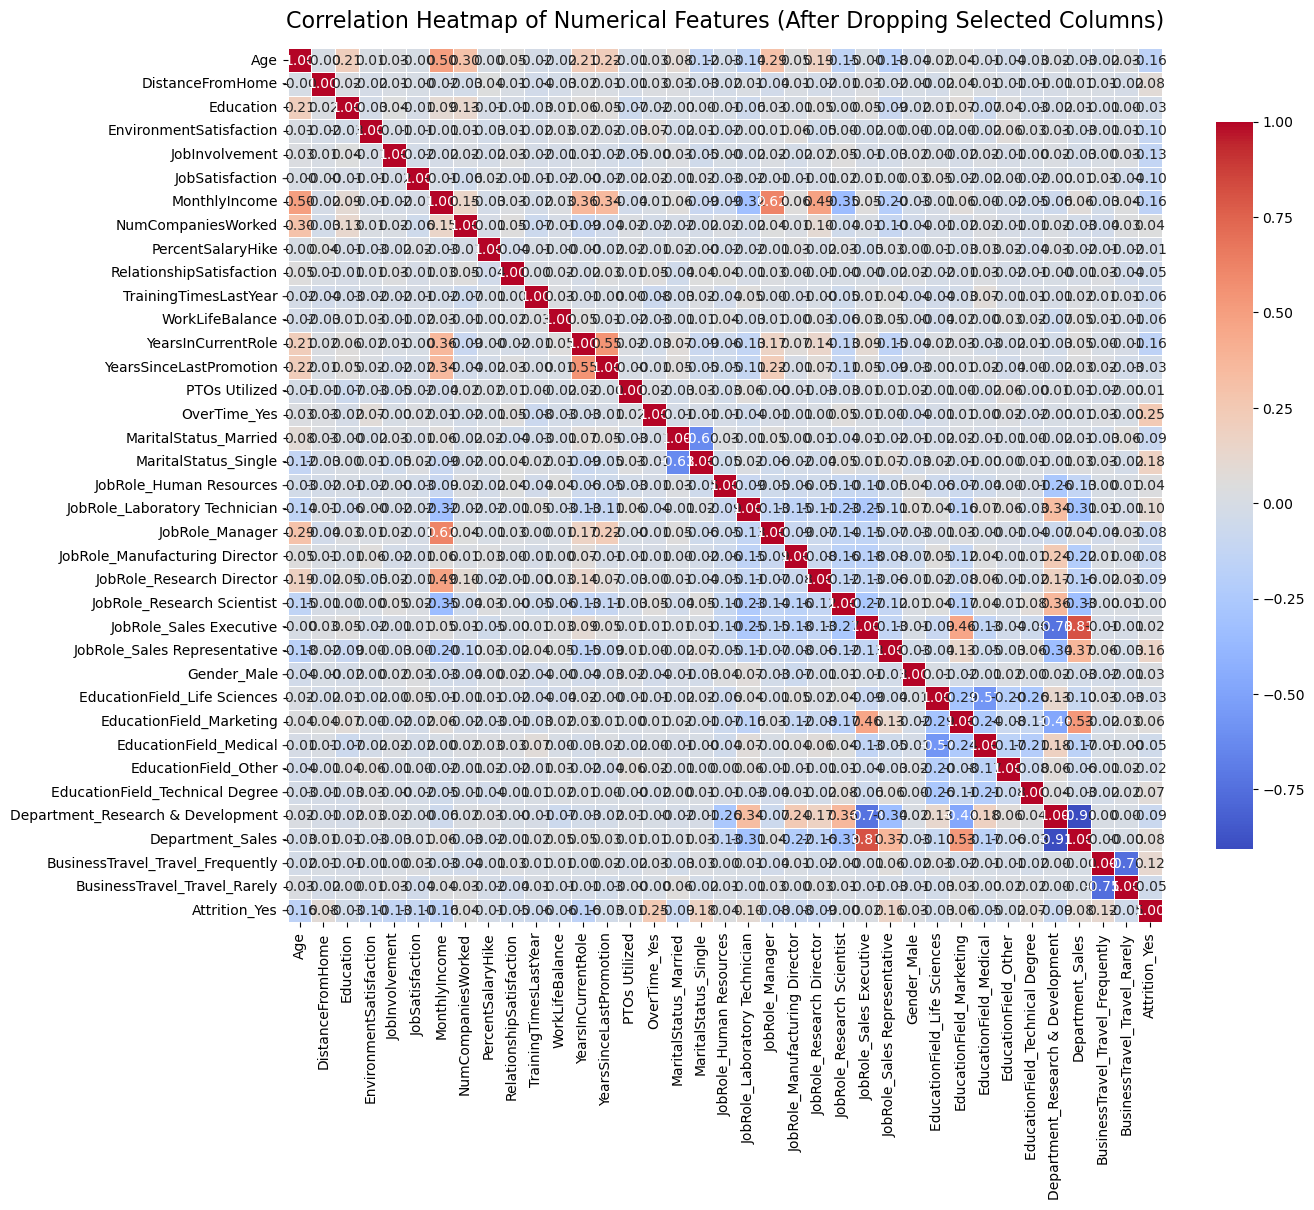

In [3]:
cols_to_drop = [ 
    "JobLevel", 
    "TotalWorkingYears",
    "PerformanceRating",
    "YearsAtCompany",
    "YearsWithCurrManager"
]

# --- Drop defined columns if they exist ---
df_filtered = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# --- Keep only numeric columns ---
# numeric_df = df_filtered.select_dtypes(include=['number'])

# --- Compute correlation matrix ---
corr_matrix = df_filtered.corr()

# --- Plot heatmap ---
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    annot=True,           # show correlation coefficients
    fmt=".2f",            # 2 decimal places
    cmap="coolwarm",      # color palette
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Numerical Features (After Dropping Selected Columns)", fontsize=16, pad=15)
plt.tight_layout()
plt.show()

In [4]:
df = df_filtered.copy()

In [5]:
X = df.drop(columns=['Attrition_Yes'])
y = df['Attrition_Yes']

from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_bal, y_bal = smt.fit_resample(X, y)

y_bal.value_counts()

Attrition_Yes
1    1136
0    1136
Name: count, dtype: int64

In [6]:
# new balanced dataframe

df_balanced = pd.concat([X_bal, y_bal], axis=1)
df_balanced

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Attrition_Yes
0,41,1,2,2,3,4,5993,8,11,1,...,1,0,0,0,0,0,1,0,1,1
1,49,8,1,3,2,2,5130,1,23,4,...,1,0,0,0,0,1,0,1,0,0
2,37,2,2,4,2,3,2090,6,15,2,...,0,0,0,1,0,1,0,0,1,1
3,33,3,4,4,3,3,2909,1,11,3,...,1,0,0,0,0,1,0,1,0,0
4,27,2,1,1,3,2,3468,9,12,4,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,24,12,1,4,3,4,2690,1,17,1,...,0,0,0,1,0,1,0,0,1,1
2268,33,18,3,1,3,3,5310,7,13,2,...,0,1,0,0,0,0,1,0,0,1
2269,47,1,4,3,3,3,4735,3,14,3,...,0,0,0,0,0,0,0,0,0,1
2270,23,5,1,2,3,1,2673,2,12,2,...,0,0,0,0,0,0,0,0,1,1


In [7]:
df = df_balanced.copy()

In [8]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# --- Define target column ---
target_col = "Attrition"

# --- Use the balanced dataset ---
# (Assuming X_bal and y_bal are already defined and preprocessed)
X = X_bal
y = y_bal

# --- Encode target if it's categorical ---
if y.dtype == "object":
    le = LabelEncoder()
    y = le.fit_transform(y)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

# --- LazyClassifier ---
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# --- Display results ---
print("✅ Model Comparison Results:")
display(models)

  0%|          | 0/31 [00:00<?, ?it/s]

  File "c:\Users\junni\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\junni\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\junni\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Info] Number of positive: 788, number of negative: 802
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 516
[LightGBM] [Info] Number of data points in the train set: 1590, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495597 -> initscore=-0.017611
[LightGBM] [Info] Start training from score -0.017611
✅ Model Comparison Results:


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.92,0.92,0.92,0.92,0.14
LGBMClassifier,0.91,0.92,0.92,0.91,0.11
SVC,0.91,0.91,0.91,0.91,0.05
LinearSVC,0.91,0.91,0.91,0.91,0.01
CalibratedClassifierCV,0.91,0.91,0.91,0.91,0.03
ExtraTreesClassifier,0.90,0.91,0.91,0.90,0.13
LogisticRegression,0.90,0.91,0.91,0.90,0.03
RandomForestClassifier,0.90,0.90,0.90,0.90,0.15
RidgeClassifierCV,0.89,0.90,0.90,0.89,0.01


Classification Report:

              precision    recall  f1-score   support

           0     0.8815    0.9384    0.9091       341
           1     0.9342    0.8739    0.9030       341

    accuracy                         0.9062       682
   macro avg     0.9079    0.9062    0.9061       682
weighted avg     0.9079    0.9062    0.9061       682



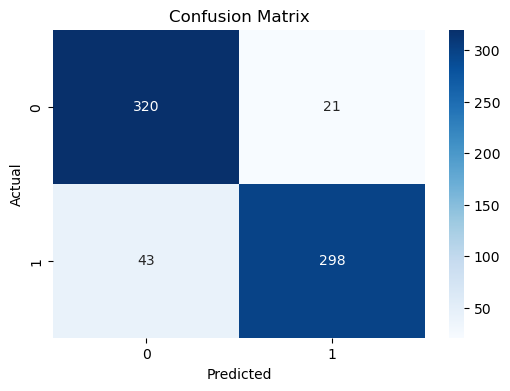

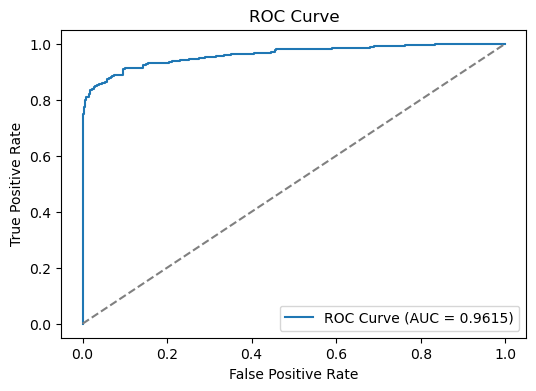

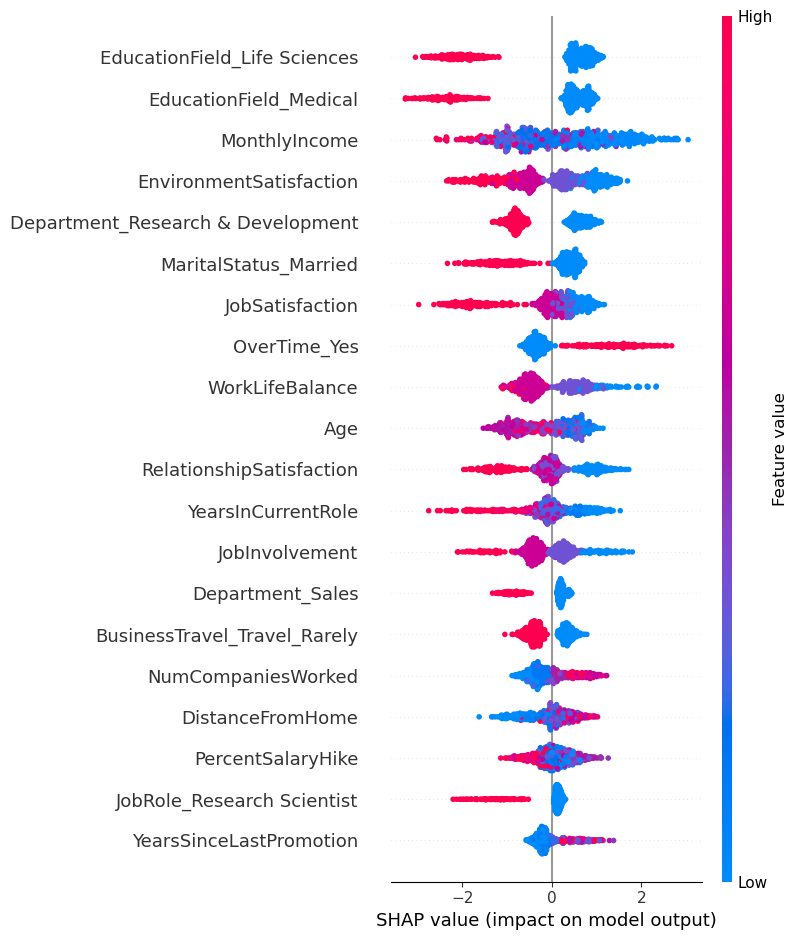

In [ ]:
# ----------------------------------------
# 1. Import Libraries
# ----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, classification_report
)
from xgboost import XGBClassifier

# ----------------------------------------
# 2. Prepare Data
# ----------------------------------------
X = df.drop(columns=['Attrition_Yes'])
y = df['Attrition_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------------------
# 3. Train XGBClassifier
# ----------------------------------------
model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,   # Avoids warning
    eval_metric='logloss'      # Required since use_label_encoder=False
)
model.fit(X_train, y_train)

# ----------------------------------------
# 4. Predictions and Metrics
# ----------------------------------------
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# ----------------------------------------
# 5. Confusion Matrix
# ----------------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ----------------------------------------
# 6. ROC Curve and AUC
# ----------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# ----------------------------------------
# 7. SHAP Summary Plot
# ----------------------------------------
explainer = shap.Explainer(model, X_test)  # Works directly with XGBoost
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values.values, X_test, plot_type="dot")


In [ ]:
# sample xgboost probability prediction (log odds to sigmoid function = probability)

# ----------------------------------------
# 1. Import Libraries
# ----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from scipy.special import expit  # sigmoid

# ----------------------------------------
# 2. Load Sample Dataset
# ----------------------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# For readability, add an Employee-like ID column
X['EmployeeID'] = range(1, len(X) + 1)

# ----------------------------------------
# 3. Train/Test Split
# ----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X.drop(columns=['EmployeeID']), y,
    test_size=0.2, random_state=42, stratify=y
)

# ----------------------------------------
# 4. Train XGBClassifier
# ----------------------------------------
model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

# ----------------------------------------
# 5. Get Predictions and Scores
# ----------------------------------------
# Raw model output (log-odds, before sigmoid)
log_odds = model.predict(X_test, output_margin=True)

# Convert to probabilities using sigmoid
probabilities = expit(log_odds)

# Get predicted class labels (0/1)
predicted_labels = (probabilities >= 0.5).astype(int)

# ----------------------------------------
# 6. Combine into a DataFrame
# ----------------------------------------
results = pd.DataFrame({
    'EmployeeID': X.loc[X_test.index, 'EmployeeID'],
    'Log_Odds': log_odds,
    'Probability': probabilities,
    'Predicted_Label': predicted_labels,
    'Actual_Label': y_test
})

# Display first few rows
print(results.head(10))

# ----------------------------------------
# 7. Optional: Model performance
# ----------------------------------------
print("\nClassification Report:\n")
print(classification_report(y_test, predicted_labels, digits=4))


     EmployeeID  Log_Odds  Probability  Predicted_Label  Actual_Label
256         257     -7.94         0.00                0             0
428         429      8.12         1.00                1             1
501         502     -7.60         0.00                0             0
363         364     -0.56         0.36                0             1
564         565     -7.99         0.00                0             0
464         465      7.09         1.00                1             1
358         359      9.41         1.00                1             1
343         344     -7.81         0.00                0             0
516         517     -7.95         0.00                0             0
567         568     -8.29         0.00                0             0

Classification Report:

              precision    recall  f1-score   support

           0     0.9744    0.9048    0.9383        42
           1     0.9467    0.9861    0.9660        72

    accuracy                         0.95